# Tester

In [1]:
import numpy as np
from keras import models

DIRECTORY = '/home/hivini/learn/research/new-covid/'
DATASET_FOLDER = DIRECTORY + 'COVID-19_Radiography_Dataset'
IMG_SIZE = 150

model = models.load_model('/home/hivini/learn/research/new-covid/test/model_data_aug_adam_acc_96_65.h5')

2021-10-22 09:22:22.180786: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-10-22 09:22:25.510017: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-22 09:22:25.519618: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-10-22 09:22:26.057352: E tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:927] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2021-10-22 09:22:26.057472: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 2080 with Max-Q Design computeCapability: 7.5
coreClock: 1.215GHz coreCount: 46 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 357.69GiB/s
2021-10-22 09:22:26.057520: I tensorflow/stre

In [2]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/home/hivini/learn/research/new-covid/small_dataset/train',
    target_size=(150, 150),
    shuffle=False,
    class_mode='categorical',
    color_mode='grayscale'
)

validation_generator = validation_datagen.flow_from_directory(
    '/home/hivini/learn/research/new-covid/small_dataset/validation',
    target_size=(150, 150),
    shuffle=False,
    class_mode='categorical',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_directory(
    '/home/hivini/learn/research/new-covid/small_dataset/test',
    target_size=(150, 150),
    shuffle=False,
    class_mode='categorical',
    color_mode='grayscale'
)

Found 10606 images belonging to 3 classes.
Found 2273 images belonging to 3 classes.
Found 2274 images belonging to 3 classes.


In [3]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def confusionMatrix(datagen):
    Y_pred = model.predict(datagen)
    print(Y_pred)
    y_pred = np.argmax(Y_pred, axis=1)
    print('Confusion Matrix')
    matrix = confusion_matrix(datagen.classes, y_pred)
    print(matrix)
    print('Classification Report')
    print(classification_report(datagen.classes, y_pred))

In [4]:
test_loss, test_acc = model.evaluate(test_generator)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_acc)

2021-10-22 09:22:30.205189: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-22 09:22:30.207051: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2208005000 Hz
2021-10-22 09:22:30.457521: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2021-10-22 09:22:30.941553: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2021-10-22 09:22:32.997221: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2021-10-22 09:22:33.110959: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


72/72 [==============================] - 24s 179ms/step - loss: 0.0890 - accuracy: 0.9648
Loss on test set:  0.08897365629673004
Accuracy on test set:  0.9648197293281555


In [5]:
# Mostrar la matriz en porcentajes tambien.
# Hacer un analisis de las que se equivoco en comparacion con las que 
# agarro correcto con el heatmap y ver visualmente como el modelo se equivoco
# Cambiar el heatmap como una serie de cuadros mejor.
confusionMatrix(test_generator)

[[6.0441862e-03 9.9395579e-01 2.0317533e-08]
 [9.8785621e-01 1.2143407e-02 3.1174011e-07]
 [9.9955136e-01 4.3081114e-04 1.7729333e-05]
 ...
 [3.8645588e-04 1.1115870e-02 9.8849773e-01]
 [4.2145923e-04 8.9530587e-01 1.0427258e-01]
 [1.8800375e-01 4.4470552e-01 3.6729079e-01]]
Confusion Matrix
[[ 502   39    2]
 [  13 1514    2]
 [   1   23  178]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.92      0.95       543
           1       0.96      0.99      0.98      1529
           2       0.98      0.88      0.93       202

    accuracy                           0.96      2274
   macro avg       0.97      0.93      0.95      2274
weighted avg       0.97      0.96      0.96      2274



In [6]:
test_loss, test_acc = model.evaluate(train_generator)
print("Loss on train set: ", test_loss)
print("Accuracy on train set: ", test_acc)

332/332 [==============================] - 32s 97ms/step - loss: 0.0710 - accuracy: 0.9740
Loss on train set:  0.07095251977443695
Accuracy on train set:  0.9739769697189331


In [7]:
confusionMatrix(train_generator)

[[9.4810313e-01 5.1896043e-02 7.5036888e-07]
 [9.9967635e-01 1.2818910e-04 1.9548385e-04]
 [9.9999583e-01 4.1339435e-06 7.6942597e-13]
 ...
 [3.2007354e-03 4.5750356e-01 5.3929573e-01]
 [1.4445329e-02 7.5532414e-02 9.1002226e-01]
 [2.8417117e-04 7.8481035e-03 9.9186772e-01]]
Confusion Matrix
[[2399  128    4]
 [  54 7068   12]
 [   2   76  863]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2531
           1       0.97      0.99      0.98      7134
           2       0.98      0.92      0.95       941

    accuracy                           0.97     10606
   macro avg       0.98      0.95      0.96     10606
weighted avg       0.97      0.97      0.97     10606



In [8]:
test_loss, test_acc = model.evaluate(validation_generator)
print("Loss on validation set: ", test_loss)
print("Accuracy on validation set: ", test_acc)

72/72 [==============================] - 14s 197ms/step - loss: 0.1028 - accuracy: 0.9639
Loss on validation set:  0.10276231169700623
Accuracy on validation set:  0.9639243483543396


In [9]:
confusionMatrix(validation_generator)

[[9.9925166e-01 7.4354059e-04 4.7496860e-06]
 [9.8322338e-01 1.6775625e-02 1.1022523e-06]
 [9.9972659e-01 2.6785902e-04 5.4736233e-06]
 ...
 [4.6279732e-05 6.6288245e-05 9.9988747e-01]
 [2.2947091e-04 5.4966051e-02 9.4480449e-01]
 [8.7340194e-04 4.5863894e-01 5.4048765e-01]]
Confusion Matrix
[[ 502   39    1]
 [  20 1507    2]
 [   3   17  182]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       542
           1       0.96      0.99      0.97      1529
           2       0.98      0.90      0.94       202

    accuracy                           0.96      2273
   macro avg       0.97      0.94      0.95      2273
weighted avg       0.96      0.96      0.96      2273



## Heatmap

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       7

In [11]:
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import cv2

class GradCAM:
    def __init__(self, model, classIdx, layerName=None):
        # store the model, the class index used to measure the class
        # activation map, and the layer to be used when visualizing
        # the class activation map
        self.model = model
        self.classIdx = classIdx
        self.layerName = layerName
        # if the layer name is None, attempt to automatically find
        # the target output layer
        if self.layerName is None:
            self.layerName = self.find_target_layer()

    def find_target_layer(self):
        # attempt to find the final convolutional layer in the network
        # by looping over the layers of the network in reverse order
        for layer in reversed(self.model.layers):
            # check to see if the layer has a 4D output
            if len(layer.output_shape) == 4:
                print('USING LAYER: ', layer.name)
                return layer.name
        # otherwise, we could not find a 4D layer so the GradCAM
        # algorithm cannot be applied
        raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")


    def compute_heatmap(self, image, eps=1e-8):
        # construct our gradient model by supplying (1) the inputs
        # to our pre-trained model, (2) the output of the (presumably)
        # final 4D layer in the network, and (3) the output of the
        # softmax activations from the model
        gradModel = Model(
            inputs=[self.model.inputs],
            outputs=[self.model.get_layer(self.layerName).output, self.model.output])

        # record operations for automatic differentiation
        with tf.GradientTape() as tape:
            # cast the image tensor to a float-32 data type, pass the
            # image through the gradient model, and grab the loss
            # associated with the specific class index
            inputs = tf.cast(image, tf.float32)
            (convOutputs, predictions) = gradModel(inputs)
            
            loss = predictions[:, tf.argmax(predictions[0])]
    
        # use automatic differentiation to compute the gradients
        grads = tape.gradient(loss, convOutputs)

        # compute the guided gradients
        castConvOutputs = tf.cast(convOutputs > 0, "float32")
        castGrads = tf.cast(grads > 0, "float32")
        guidedGrads = castConvOutputs * castGrads * grads
        # the convolution and guided gradients have a batch dimension
        # (which we don't need) so let's grab the volume itself and
        # discard the batch
        convOutputs = convOutputs[0]
        guidedGrads = guidedGrads[0]

        # compute the average of the gradient values, and using them
        # as weights, compute the ponderation of the filters with
        # respect to the weights
        weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
        cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

        # grab the spatial dimensions of the input image and resize
        # the output class activation map to match the input image
        # dimensions
        (w, h) = (image.shape[2], image.shape[1])
        heatmap = cv2.resize(cam.numpy(), (w, h))
        # normalize the heatmap such that all values lie in the range
        # [0, 1], scale the resulting values to the range [0, 255],
        # and then convert to an unsigned 8-bit integer
        numer = heatmap - np.min(heatmap)
        denom = (heatmap.max() - heatmap.min()) + eps
        heatmap = numer / denom
        heatmap = (heatmap * 255).astype("uint8")
        # return the resulting heatmap to the calling function
        return heatmap

    def overlay_heatmap(self, heatmap, image, alpha=0.5,
                        colormap=cv2.COLORMAP_VIRIDIS):
        # apply the supplied color map to the heatmap and then
        # overlay the heatmap on the input image
        heatmap = cv2.applyColorMap(heatmap, colormap)
        output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)
        # return a 2-tuple of the color mapped heatmap and the output,
        # overlaid image
        return (heatmap, output)

In [12]:
from keras.preprocessing.image import load_img, img_to_array

def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = load_img(img_path, target_size=size, color_mode='grayscale')
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = img_to_array(img)
    norm = np.linalg.norm(array)
    normal_array = array/norm
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    normal_array = np.expand_dims(normal_array, axis=0)
    return normal_array

In [16]:
image = get_img_array('/home/hivini/learn/research/new-covid/small_dataset/test/covid/COVID-11.png', (150, 150))
preds = model.predict(image)
i = np.argmax(preds[0])
print(image.shape)
print(preds)
print(i)

(1, 150, 150, 1)
[[2.4790551e-01 7.5209439e-01 8.2343135e-08]]
1


In [19]:
import matplotlib.pyplot as plt


def showHeatmap(layerName: str):
    icam = GradCAM(model, i, layerName) 
    heatmap = icam.compute_heatmap(image)
    heatmap = cv2.resize(heatmap, (150, 150))
    heatmap = np.expand_dims(heatmap, axis=-1)
    heatmap = cv2.cvtColor(heatmap, cv2.COLOR_GRAY2RGB)

    image_r = cv2.imread('/home/hivini/learn/research/new-covid/small_dataset/test/covid/COVID-11.png', cv2.IMREAD_GRAYSCALE)
    image_r = cv2.resize(image_r, (150, 150))
    image_r = np.expand_dims(image_r, axis=-1)
    image_r = cv2.cvtColor(image_r, cv2.COLOR_GRAY2RGB)
    (heatmap, output) = icam.overlay_heatmap(heatmap, image_r, alpha=0.5)

    fig, ax = plt.subplots(1, 3)
    fig.suptitle(layerName, fontsize=12)
    ax[0].imshow(image_r)
    ax[1].imshow(heatmap)
    ax[2].imshow(output)

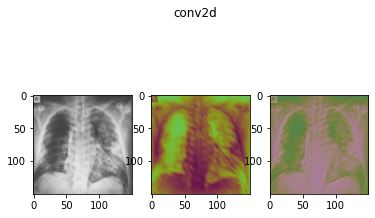

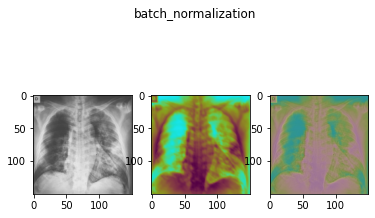

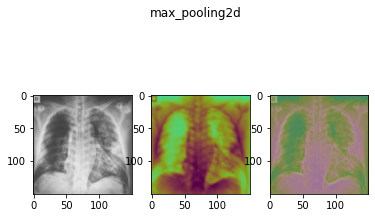

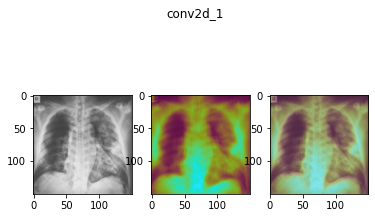

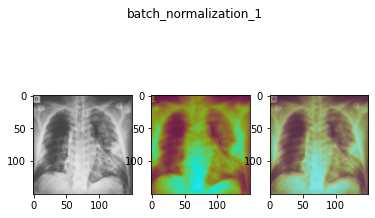

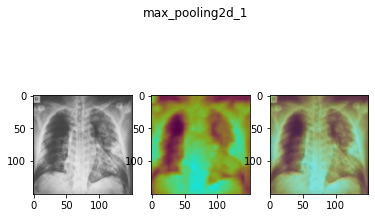

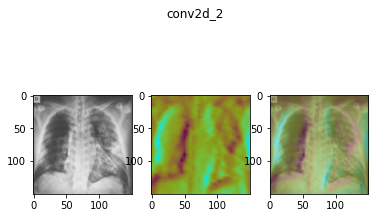

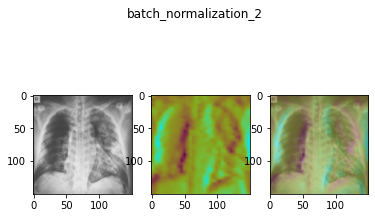

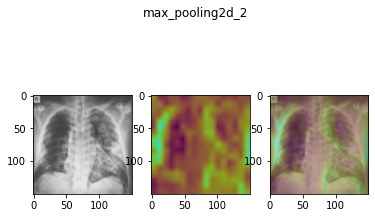

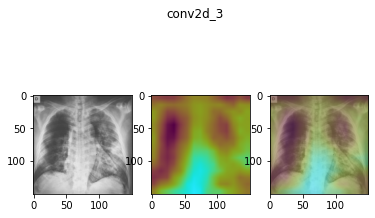

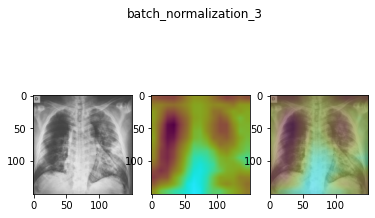

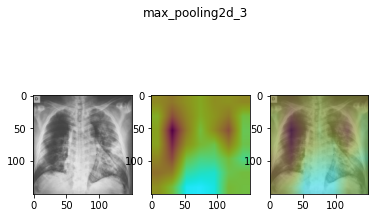

In [20]:
for layer in model.layers:
    # check to see if the layer has a 4D output
    if len(layer.output_shape) == 4:
        showHeatmap(layer.name)